**This notebook generates test samples similar to those used in experiment 1 in the article: *Evidence of a cognitive bias in the quantification of COVID-19 with CT: an artificial intelligence randomised clinical trial***

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

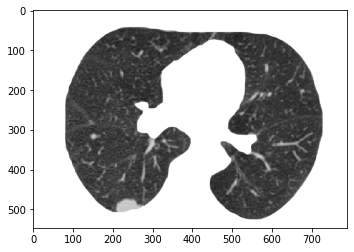

In [3]:
# read base files
img = cv2.imread("./base template/baseline.png", cv2.IMREAD_UNCHANGED)
background = cv2.imread("./base template/background.png", cv2.IMREAD_UNCHANGED)

# fix background size mismatch (due to transparency)
img = cv2.copyMakeBorder(img, 42, 22, 80, 64, cv2.BORDER_CONSTANT)

plt.imshow(img)

In [4]:
blue = [0, 162, 215, 255]
red = [208, 10, 10, 255]

def fill_easy(orig_img, orig_background, p):
    """
    generate an intuitive sample of ratio p
    """
    
    # init
    img = np.copy(orig_img)
    background = np.copy(orig_background)
    _, mask = cv2.threshold(img[:,:,3], 150, 255, cv2.THRESH_BINARY)
    
    # split p %
    for i in range(img.shape[0]):
        if mask[:i,:].sum() > p * mask.sum():
            print("ratio: ", mask[:i,:].sum() / mask.sum() * 100)
            break
    
    # fill blue area
    blue_mask = (np.ones(img.shape) * np.array(blue)).astype(np.uint8)
    blue_mask = cv2.bitwise_and(blue_mask,blue_mask, mask = mask)
    img = cv2.addWeighted(img, 0.7, blue_mask, 0.3, 0)
    
    # fill red area
    red_mask = (np.ones(img[:i,:,:].shape) * np.array(red)).astype(np.uint8)
    red_mask = cv2.bitwise_and(red_mask,red_mask, mask = mask[:i,:])
    img[:i,:,:] = cv2.addWeighted(img[:i,:,:], 0.65, red_mask, 0.35, 0)
    
    # merge with background
    background = cv2.bitwise_and(background,background, mask = 255-mask)
    img = cv2.bitwise_and(img,img, mask = mask)
    img = background + img
    
    # draw contours
    blue_contours, _ = cv2.findContours(image=blue_mask[:,:,3], mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    img = cv2.drawContours(img, blue_contours, -1, blue, 5)
    
    kernel = np.ones((5, 5), np.uint8)
    red_mask[:,:,3] = cv2.erode(red_mask[:,:,3], kernel, iterations=2)
    red_contours, _ = cv2.findContours(image=red_mask[:,:,3], mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    img = cv2.drawContours(img, red_contours, -1, red, 5)
    
    return img

def fill_hard(orig_img, orig_background, p):
    """
    generate an unintuitive sample of ratio p
    """
    
    # init
    img = np.copy(orig_img)
    background = np.copy(orig_background)
    _, mask = cv2.threshold(img[:,:,3], 150, 255, cv2.THRESH_BINARY)
    
    # fill blue area
    blue_mask = (np.ones(img.shape) * np.array(blue)).astype(np.uint8)
    blue_mask = cv2.bitwise_and(blue_mask,blue_mask, mask = mask)
    img = cv2.addWeighted(img, 0.7, blue_mask, 0.3, 0)
    
    # init red mask
    red_mask = (np.ones(img.shape) * np.array(red)).astype(np.uint8)
    red_mask = cv2.bitwise_and(red_mask,red_mask, mask = mask)
    
    # get the blue contour
    blue_contours, _ = cv2.findContours(image=blue_mask[:,:,3], mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    
    # split p %
    kernel = np.ones((3, 3), np.uint8)
    for i in range(200):
        red_mask[:,:,3] = cv2.erode(red_mask[:,:,3], kernel, iterations=1)

        if abs(red_mask[:,:,3].sum() / blue_mask[:,:,3].sum() - p) < 1e-2:
            print("ratio: ", red_mask[:,:,3].sum() / blue_mask[:,:,3].sum() * 100)
            break
    
    # draw red area & contour
    red_mask = cv2.bitwise_and(red_mask,red_mask, mask = red_mask[:,:,3])
    img2 = cv2.addWeighted(img, 0.65, red_mask, 0.35, 0)
    img = cv2.bitwise_and(img2,img2, mask = red_mask[:,:,3]) + cv2.bitwise_and(img,img, mask = 255- red_mask[:,:,3])
    red_contours, _ = cv2.findContours(image=red_mask[:,:,3], mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    img = cv2.drawContours(img, red_contours, -1, red, 5)
    
    # merge with background
    background = cv2.bitwise_and(background,background, mask = 255-mask)
    img = cv2.bitwise_and(img,img, mask = mask)
    img = background + img

    # draw blue contour
    img = cv2.drawContours(img, blue_contours, -1, blue, 5)
    
    return img


ratio:  70.11098715188847


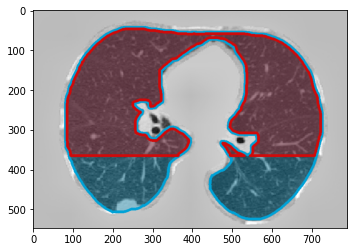

In [5]:
plt.imshow(fill_easy(img, background, 0.7))

ratio:  70.2335496509064


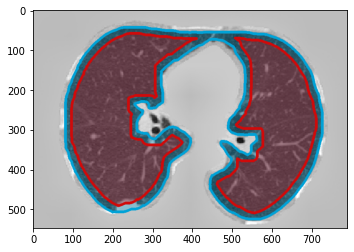

In [6]:
plt.imshow(fill_hard(img, background, 0.7))